<a href="https://colab.research.google.com/github/kunalburgul/LTFS_Hackathon/blob/main/Top_Up_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **LTFS Top-up loan Up-sell prediction**

A loan is when you receive the money from a financial institution in exchange for future repayment of the principal, plus interest. Financial institutions provide loans to the industries, corporates and individuals. The interest received on these loans is one among the main sources of income for the financial institutions.

A top-up loan, true to its name, is a facility of availing further funds on an existing loan. When you have a loan that has already been disbursed and under repayment and if you need more funds then, you can simply avail additional funding on the same loan thereby minimizing time, effort and cost related to applying again.

LTFS provides it’s loan services to its customers and is interested in selling more of its Top-up loan services to its existing customers so they have decided to identify when to pitch a Top-up during the original loan tenure.  If they correctly identify the most suitable time to offer a top-up, this will ultimately lead to more disbursals and can also help them beat competing offerings from other institutions.

Here we re provided with two types of information: 

1. Customer’s Demographics: The demography table along with the target variable & demographic information contains variables related to Frequency of the loan, Tenure of the loan, Disbursal Amount for a loan & LTV.

2. Bureau data:  Bureau data contains the behavioural and transactional attributes of the customers like current balance, Loan Amount, Overdue etc. for various tradelines of a given customer



In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import datetime

In [2]:
%%capture
# Gathering the Training Data
# !gdown --id 1S9esD8VifU6StarxTYiddkyJshSRFSbA --output data_dict.xlsx
# !gdown --id 1iZNJV-pkzQwHVr5QxvQ_JVYtv6C6hJai --output train_bure.xlsx
# !gdown --id 1taJWpMQ8-zWjNFI7QfTNGAAGP6DRhzCs --output train_demograp.xlsx
!gdown --id 15t8weXCtRDIS_SG224x_xS8Tj7bea1v1 --output train_demography.csv

# Gathering the Test Data
#!gdown --id 18H1EmsAnf9oQT6skGrYwX2RzSNOiU_Ly --output test_bureau.xlsx
#!gdown --id 1LrZUtzeaoc3YG4ipvQpl4tGOYPO2vFVG --output test_data.xlsx

In [3]:
# #importing pandas as pd 
# import pandas as pd 

# # Read and store content 
# # of an excel file 
# read_file = pd.read_excel ("train_demograp.xlsx") 

# # Write the dataframe object 
# # into csv file 
# read_file.to_csv ("train_demography.csv", 
# 				index = None, 
# 				header=True) 
	
# # read csv file and convert 
# # into a dataframe object 
# df = pd.DataFrame(pd.read_csv("train_demography.csv")) 

# # show the dataframe 
# df


In [4]:
#train_bureau = pd.read_excel('train_bureau.xlsx')
train_demography = pd.read_csv('train_demography.csv')
#data_dict = pd.read_excel('data_dict.xlsx')
#test_buro = pd.read_excel('test_bureau.xlsx')
#test_data = pd.read_excel('test_data.xlsx')

In [5]:
train_data = train_demography
#train_help_data = train_bureau
pd.set_option('display.max_colwidth', None)

In [6]:
train_data = train_data.rename(columns= {"InstlmentMode":'InstalmentMode', "MaturityDAte":"MaturityDate", "Top-up Month":"TopUpMonth"})

In [7]:
print("Demography Data\n\n","**Data Shape**: ", train_data.shape, "\n", "**Data Features**: ",train_data.columns)
# print("\n\nBureau Data\n\n","**Data Shape**: ", train_help_data.shape, "\n", "**Data Features**: ",train_help_data.columns)

Demography Data

 **Data Shape**:  (128655, 26) 
 **Data Features**:  Index(['ID', 'Frequency', 'InstalmentMode', 'LoanStatus', 'PaymentMode',
       'BranchID', 'Area', 'Tenure', 'AssetCost', 'AmountFinance',
       'DisbursalAmount', 'EMI', 'DisbursalDate', 'MaturityDate', 'AuthDate',
       'AssetID', 'ManufacturerID', 'SupplierID', 'LTV', 'SEX', 'AGE',
       'MonthlyIncome', 'City', 'State', 'ZiPCODE', 'TopUpMonth'],
      dtype='object')


In [8]:
train_data.head(5)

,ID,Frequency,InstalmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDate,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,TopUpMonth
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,350000.0,10500.0,2012-03-31,2016-02-15,2012-03-31,4681175,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,No Top-up Service
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,519728.0,38300.0,2017-06-17,2023-02-10,2017-06-17,25328146,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,12-18 Months
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,400000.0,11600.0,2013-11-29,2017-11-10,2013-11-29,13021591,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,> 48 Months
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,440000.0,15000.0,2011-12-08,2015-07-05,2011-12-08,3291320,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,36-48 Months


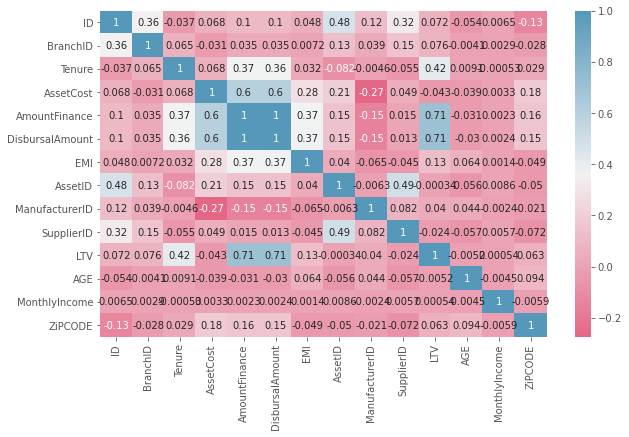

In [9]:
#get correlations of each features in dataset
corrmat = train_data.corr()
plt.figure(figsize=(10,6))
cmap = sns.diverging_palette(0, 230, 70, 60, as_cmap=True)
sns.heatmap(corrmat, annot=True, cmap=cmap)

In [10]:
def info_data(data):
    Null = pd.Series(data.isnull().sum())
    Unique_Count = pd.Series(data.describe(include='all',datetime_is_numeric=True).loc['unique', :])
    Data_type = pd.Series(data.dtypes)
    info_abt_data = pd.DataFrame(({"Null":Null, "Unique Count": Unique_Count, "Data type": Data_type}))
    return info_abt_data

In [11]:
info_data(train_data)

,Null,Unique Count,Data type
ID,0,NaN,int64
Frequency,0,4,object
InstalmentMode,0,2,object
LoanStatus,0,2,object
PaymentMode,0,11,object
BranchID,0,NaN,int64
Area,11653,92,object
Tenure,0,NaN,int64
AssetCost,0,NaN,int64
AmountFinance,0,NaN,float64


In [12]:
# train_help_data.head(5)

In [13]:
# info_data(train_help_data)

In [14]:
train_data[['DisbursalDate','MaturityDate']] = train_data[['DisbursalDate','MaturityDate']].apply(pd.to_datetime) 
train_data['LoanDuration'] = (train_data['MaturityDate'] - train_data['DisbursalDate']).dt.days

In [15]:
train_data.head(5)

,ID,Frequency,InstalmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDate,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,TopUpMonth,LoanDuration
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months,1435.0
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,350000.0,10500.0,2012-03-31,2016-02-15,2012-03-31,4681175,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,No Top-up Service,1416.0
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,519728.0,38300.0,2017-06-17,2023-02-10,2017-06-17,25328146,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,12-18 Months,2064.0
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,400000.0,11600.0,2013-11-29,2017-11-10,2013-11-29,13021591,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,> 48 Months,1442.0
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,440000.0,15000.0,2011-12-08,2015-07-05,2011-12-08,3291320,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,36-48 Months,1305.0


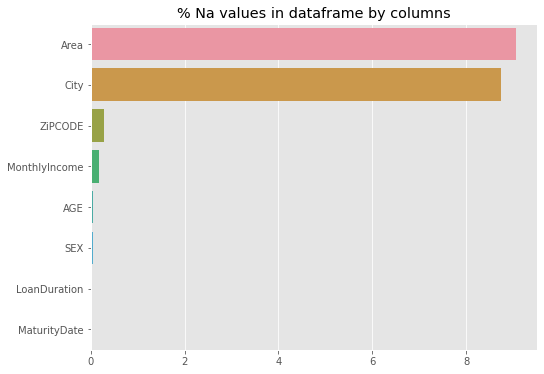

In [16]:
def plot_missing_data(train_data):
    columns_with_null = train_data.columns[train_data.isna().sum() > 0]
    null_pct = (train_data[columns_with_null].isna().sum() / train_data.shape[0]).sort_values(ascending=False) * 100
    plt.figure(figsize=(8,6));
    sns.barplot(y = null_pct.index, x = null_pct, orient='h')
    plt.title('% Na values in dataframe by columns');
    
plot_missing_data(train_data)

In [17]:
train_data = train_data.dropna(axis=0, subset=['MaturityDate','AGE', 'MonthlyIncome'])

In [18]:
train_data = train_data.drop(["Area", "City", "ZiPCODE", "SEX", "AssetID", "State", 'AuthDate', 'DisbursalDate', 'MaturityDate'], axis=1)

In [19]:
int_data_converter = ['AmountFinance', 'DisbursalAmount', 'EMI', 'LTV', 'AGE', 'MonthlyIncome', 'LoanDuration']
for i in int_data_converter:
    train_data[i] = train_data[i].apply(np.round).astype('int64')

In [20]:
info_data(train_data)

,Null,Unique Count,Data type
ID,0,NaN,int64
Frequency,0,4,object
InstalmentMode,0,2,object
LoanStatus,0,2,object
PaymentMode,0,11,object
BranchID,0,NaN,int64
Tenure,0,NaN,int64
AssetCost,0,NaN,int64
AmountFinance,0,NaN,int64
DisbursalAmount,0,NaN,int64


In [21]:
train_data['TopUpMonth']= train_data['TopUpMonth'].replace({'No Top-up Service':0, '12-18 Months':1, '18-24 Months':2, '24-30 Months':3, '30-36 Months': 4, '36-48 Months':5, ' > 48 Months':6 })

In [22]:
train_data['PaymentMode'] = train_data['PaymentMode'].replace(' ', '_', regex=True)

In [23]:
train_data['PaymentMode'] = train_data['PaymentMode'].replace('_', '', regex=True)

In [24]:
train_data.head()

,ID,Frequency,InstalmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,TopUpMonth,LoanDuration
0,1,Monthly,Arrear,Closed,PDCE,1,48,450000,275000,275000,24000,1568,21946,61,49,35833,6,1435
1,2,Monthly,Advance,Closed,PDC,333,47,485000,350000,350000,10500,1062,34802,70,23,667,0,1416
2,3,Quatrly,Arrear,Active,DirectDebit,1,68,690000,519728,519728,38300,1060,127335,70,39,45257,1,2064
3,7,Monthly,Advance,Closed,Billed,125,48,480000,400000,400000,11600,1060,25094,81,24,20833,6,1442
4,8,Monthly,Arrear,Closed,Billed,152,44,619265,440000,440000,15000,1046,21853,71,56,27314,5,1305


In [25]:
train_data['PaymentMode'].unique()

array(['PDCE', 'PDC', 'DirectDebit', 'Billed', 'ECS', 'AutoDebit',
       'SIReject', 'ECSReject', 'Cheque', 'PDCReject', 'Escrow'],
      dtype=object)

In [26]:
train_data.head(2)

,ID,Frequency,InstalmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,TopUpMonth,LoanDuration
0,1,Monthly,Arrear,Closed,PDCE,1,48,450000,275000,275000,24000,1568,21946,61,49,35833,6,1435
1,2,Monthly,Advance,Closed,PDC,333,47,485000,350000,350000,10500,1062,34802,70,23,667,0,1416


In [27]:
train_data = pd.get_dummies(train_data)

In [28]:
train_data

,ID,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,TopUpMonth,LoanDuration,Frequency_BI-Monthly,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstalmentMode_Advance,InstalmentMode_Arrear,LoanStatus_Active,LoanStatus_Closed,PaymentMode_AutoDebit,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_DirectDebit,PaymentMode_ECS,PaymentMode_ECSReject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDCE,PaymentMode_PDCReject,PaymentMode_SIReject
0,1,1,48,450000,275000,275000,24000,1568,21946,61,49,35833,6,1435,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2,333,47,485000,350000,350000,10500,1062,34802,70,23,667,0,1416,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,3,1,68,690000,519728,519728,38300,1060,127335,70,39,45257,1,2064,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0
3,7,125,48,480000,400000,400000,11600,1060,25094,81,24,20833,6,1442,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,8,152,44,619265,440000,440000,15000,1046,21853,71,56,27314,5,1305,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128650,143390,424,24,470000,265601,265601,76800,1568,48879,40,25,65333,3,623,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
128651,143391,424,24,460000,275630,275630,80100,1568,48879,60,25,83333,0,622,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
128652,143393,424,23,545000,300733,300733,15277,1568,44118,52,36,248500,0,713,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0
128653,143394,424,35,350000,250962,250962,74341,1568,48879,50,37,84500,0,898,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0


In [29]:
X = train_data.drop(['TopUpMonth','ID'], axis = 1)
y = train_data['TopUpMonth'] 

In [30]:
print("Data For Training model\n\n","Input data: ", X.shape, "\n", "Output data: ",y.shape)

Data For Training model

 Input data:  (128414, 31) 
 Output data:  (128414,)


In [31]:
X.head()

,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,LoanDuration,Frequency_BI-Monthly,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstalmentMode_Advance,InstalmentMode_Arrear,LoanStatus_Active,LoanStatus_Closed,PaymentMode_AutoDebit,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_DirectDebit,PaymentMode_ECS,PaymentMode_ECSReject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDCE,PaymentMode_PDCReject,PaymentMode_SIReject
0,1,48,450000,275000,275000,24000,1568,21946,61,49,35833,1435,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1,333,47,485000,350000,350000,10500,1062,34802,70,23,667,1416,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,1,68,690000,519728,519728,38300,1060,127335,70,39,45257,2064,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0
3,125,48,480000,400000,400000,11600,1060,25094,81,24,20833,1442,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,152,44,619265,440000,440000,15000,1046,21853,71,56,27314,1305,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print("Training Data :","X_train:", X_train.shape, "--- y_train:", y_train.shape,"\nTesting Data  :" " X_test:",X_test.shape, " --- y_test:",y_test.shape)

Training Data : X_train: (89889, 31) --- y_train: (89889,) 
Testing Data  : X_test: (38525, 31)  --- y_test: (38525,)


In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# define the model
model_xgbc = XGBClassifier()
# fit the model on train data
model_xgbc.fit(X_train, y_train)
# predict on test set
yhat_xgbc = model_xgbc.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat_xgbc)
print("---------------------------------------------")
print('Accuracy: %.2f' % (accuracy*100))
print("---------------------------------------------")
print(classification_report(y_test,yhat_xgbc))

---------------------------------------------
Accuracy: 83.15
---------------------------------------------
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     32033
           1       0.00      0.00      0.00       320
           2       0.00      0.00      0.00       692
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       900
           5       0.00      0.00      0.00      1080
           6       0.00      0.00      0.00      2490

    accuracy                           0.83     38525
   macro avg       0.12      0.14      0.13     38525
weighted avg       0.69      0.83      0.75     38525



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
